## 1. installation neccessary libraries 

In [1]:
pip install umap-learn

     |████████████████████████████████| 86 kB 4.2 MB/s 
     |████████████████████████████████| 1.1 MB 15.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=90b297dbbd917a176b46023990948243c8699efee3d6d9157f57a806602ef15a
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=69fb436dec4ecb562804cd025ff6016b8d5159074a2b3bca163011c3bf2201b6
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [2]:

 # ----------------------------------GENERAL---------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams  
import seaborn as sns
# ----------------------------------OTHER-----------------------------------
import warnings
warnings.filterwarnings("ignore")
# ----------------------------------VISUALIZATION---------------------------
from plotly import graph_objs as go
plt.rcParams["figure.figsize"] = (12, 8)

import matplotlib as mpl
from matplotlib import cm
#from colorspacious import cspace_converter
from collections import OrderedDict
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score

# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE  
import umap
from sklearn.decomposition import PCA

import colorcet as cc

In [3]:
print("Numpy Version:",np.__version__)

Numpy Version: 1.19.5


## 1.1 Retrive 30% data from Dataset 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Subset30 = pd.read_csv('/content/drive/MyDrive/Idorsia Capstone Project/data/subset_30.zip')

In [6]:
Subset30.head()

,Unnamed: 0,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,...,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type
0,GSM3721462_TTAACTCGTGGTCCGT,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,-0.314901,-0.123083,-0.478353,-0.121983,-0.410996,-0.317847,1.079731,-0.391834,2.974507,-0.301609,-0.098347,-0.279872,-0.395123,-0.191592,-0.141523,2.747149,-0.286109,-0.258971,-0.405238,2.290373,-0.221732,-0.336877,-0.186678,-0.190720,-0.397566,-0.121845,-0.290821,-0.388675,-0.311518,-0.330698,...,-0.280496,-0.108033,-0.378217,-0.303091,1.793907,-0.161401,4.651855,-0.297566,-0.692460,-0.375107,-0.377831,-0.095107,-0.533894,-0.263100,-0.352260,-1.154305,-0.382664,-0.426481,-0.379495,-0.342781,-0.212108,0.508784,-0.968659,-0.167294,-0.175711,-0.158574,-0.314983,-0.196282,-0.375283,-1.761688,-0.432253,0.329213,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004,CD4 regulatory T-cell (unspecified),T-cell
1,ERS3566166_TTAGGACGTATCGCAT,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,-0.359724,-0.094244,-0.434981,-0.189475,-0.235168,-0.368243,-0.923308,-0.340171,-0.306440,-0.214260,-0.094144,-0.236329,-0.306553,-0.231763,-0.188861,-0.591062,-0.322846,-0.314922,-0.458404,2.475220,-0.198593,-0.366953,-0.152740,-0.180766,-0.427092,-0.135466,-0.284995,-0.375764,-0.263782,-0.403794,...,-0.302923,-0.147672,-0.395308,-0.210619,0.566931,-0.157472,-0.211639,-0.283868,-0.457814,-0.286747,-0.342757,-0.138169,-0.573991,-0.310218,-0.326078,-1.110088,-0.238186,-0.205472,2.835677,-0.192411,-0.171109,0.858273,2.118469,-0.197778,-0.206334,-0.164395,-0.345497,-0.283872,-0.360782,-0.247293,0.725249,-0.654162,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424,CD8 exhausted cytotoxic T-cell (unspecified),T-cell
2,GSM4143657_GTATTCTGTGGCGAAT,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,2.120046,6.166434,1.260205,-0.260681,-0.442320,-0.305378,0.980242,-0.375075,-0.338135,-0.378109,-0.098390,-0.273910,-0.412770,-0.195258,-0.143248,-0.767891,2.455667,-0.260026,-0.404972,1.378897,-0.238459,-0.356384,-0.180861,-0.196920,-0.402247,-0.125187,-0.321445,1.539020,-0.322930,-0.362763,...,2.432226,-0.136461,-0.406624,-0.327391,0.134323,-0.162440,-0.213711,-0.451615,-0.799243,-0.395797,-0.404153,-0.150954,-0.551123,-0.260729,-0.372876,-0.166995,-0.382728,-0.475363,-0.420067,-0.360509,-0.235100,-0.072508,0.625717,-0.157375,-0.179278,-0.167442,-0.312845,-0.214009,-0.357135,0.161567,0.077252,-0.491519,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371,CD4 helper T-cell (unspecified),T-cell
3,GSM3511757_TTGACTTCAAACAACA,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,-0.296662,-0.124381,-0.493961,-0.168745,-0.457732,-0.306684,1.827102,-0.403985,-0.350837,-0.330297,-0.108919,-0.304182,-0.401522,-0.176835,-0.128035,-0.753513,-0.281455,-0.258681,-0.395121,-0.404980,-0.216367,-0.334333,-0.191253,-0.192640,-0.383314,-0.128038,3.274703,-0.399176,-0.309047,-0.330898,...,-0.263550,-0.110059,-0.346198,-0.305871,0.030387,-0.178059,-0.212737,-0.253249,0.964312,2.300342,-0.369430,-0.109067,3.033242,-0.252673,-0.293199,0.298238,-0.394649,-0.472961,-0.401968,-0.380347,-0.215548,0.436071,-0.975147,-0.162729,-0.181099,-0.155006,-0.311501,-0.193034,2.493191,1.230001,0.532403,0.197154,0.532417,0.726922,1.634403,-1.353829,0.354251,-0.382876,CD8 memory T-cell (unspecified),T-cell
4,GSM4143657_GCGGGTTCAGAAGCAC,-0.121376,-0.774814,-0.575436,-0.578104,-0.104302,-0.405512,-0.321372,2.989727,-0.381909,-0.298511,-0.111178,1.249000,-0.25628

In [7]:
Subset30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32557 entries, 0 to 32556
Columns: 3003 entries, Unnamed: 0 to cell_type
dtypes: float64(3000), object(3)
memory usage: 745.9+ MB


## 1.2. Delete Columns that contain string for further processing

In [8]:
Subset30_int = Subset30.drop(columns=['Unnamed: 0', 'cell_type', 'cell_state'])


In [9]:
Subset30_int.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BTG3,C21orf91,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB
0,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,-0.314901,-0.123083,-0.478353,-0.121983,-0.410996,-0.317847,1.079731,-0.391834,2.974507,-0.301609,-0.098347,-0.279872,-0.395123,-0.191592,-0.141523,2.747149,-0.286109,-0.258971,-0.405238,2.290373,-0.221732,-0.336877,-0.186678,-0.190720,-0.397566,-0.121845,-0.290821,-0.388675,-0.311518,-0.330698,-0.205876,...,3.676350,-0.362061,-0.280496,-0.108033,-0.378217,-0.303091,1.793907,-0.161401,4.651855,-0.297566,-0.692460,-0.375107,-0.377831,-0.095107,-0.533894,-0.263100,-0.352260,-1.154305,-0.382664,-0.426481,-0.379495,-0.342781,-0.212108,0.508784,-0.968659,-0.167294,-0.175711,-0.158574,-0.314983,-0.196282,-0.375283,-1.761688,-0.432253,0.329213,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004
1,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,-0.359724,-0.094244,-0.434981,-0.189475,-0.235168,-0.368243,-0.923308,-0.340171,-0.306440,-0.214260,-0.094144,-0.236329,-0.306553,-0.231763,-0.188861,-0.591062,-0.322846,-0.314922,-0.458404,2.475220,-0.198593,-0.366953,-0.152740,-0.180766,-0.427092,-0.135466,-0.284995,-0.375764,-0.263782,-0.403794,-0.931781,...,-0.326355,-0.278311,-0.302923,-0.147672,-0.395308,-0.210619,0.566931,-0.157472,-0.211639,-0.283868,-0.457814,-0.286747,-0.342757,-0.138169,-0.573991,-0.310218,-0.326078,-1.110088,-0.238186,-0.205472,2.835677,-0.192411,-0.171109,0.858273,2.118469,-0.197778,-0.206334,-0.164395,-0.345497,-0.283872,-0.360782,-0.247293,0.725249,-0.654162,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424
2,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,2.120046,6.166434,1.260205,-0.260681,-0.442320,-0.305378,0.980242,-0.375075,-0.338135,-0.378109,-0.098390,-0.273910,-0.412770,-0.195258,-0.143248,-0.767891,2.455667,-0.260026,-0.404972,1.378897,-0.238459,-0.356384,-0.180861,-0.196920,-0.402247,-0.125187,-0.321445,1.539020,-0.322930,-0.362763,0.687239,...,-0.555690,1.797215,2.432226,-0.136461,-0.406624,-0.327391,0.134323,-0.162440,-0.213711,-0.451615,-0.799243,-0.395797,-0.404153,-0.150954,-0.551123,-0.260729,-0.372876,-0.166995,-0.382728,-0.475363,-0.420067,-0.360509,-0.235100,-0.072508,0.625717,-0.157375,-0.179278,-0.167442,-0.312845,-0.214009,-0.357135,0.161567,0.077252,-0.491519,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371
3,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,-0.296662,-0.124381,-0.493961,-0.168745,-0.457732,-0.306684,1.827102,-0.403985,-0.350837,-0.330297,-0.108919,-0.304182,-0.401522,-0.176835,-0.128035,-0.753513,-0.281455,-0.258681,-0.395121,-0.404980,-0.216367,-0.334333,-0.191253,-0.192640,-0.383314,-0.128038,3.274703,-0.399176,-0.309047,-0.330898,-0.375920,...,-0.535815,-0.380166,-0.263550,-0.110059,-0.346198,-0.305871,0.030387,-0.178059,-0.212737,-0.253249,0.964312,2.300342,-0.369430,-0.109067,3.033242,-0.252673,-0.293199,0.298238,-0.394649,-0.472961,-0.401968,-0.380347,-0.215548,0.436071,-0.975147,-0.162729,-0.181099,-0.155006,-0.311501,-0.193034,2.493191,1.230001,0.532403,0.197154,0.532417,0.726922,1.634403,-1.353829,0.354251,-0.382876
4,-0.121376,-0.774814,-0.575436,-0.578104,-0.104302,-0.405512,-0.321372,2.989727,-0.381909,-0.298511,-0.111178,1.249000,-0.256280,-0.477980,-0.295020,-1.270073,1.637584,-0.340192,-0.388275,-0.098180,-0.275919,-0.420009,-0.185286,-0.133830,-0.805667,-0.259764,-0.236489,-0.403877,-0.513184,-0.250167,-0.356462,-0.185127,-0.198283,1.61295

## 2. Data Vistualization

**orig.ident:** Original data repository ID from GEO or ArrayExpress.

**nCount_RNA:** Number of detected RNA molecules (UMIs).

**nFeature_RNA:** Number of detected genes.

**publication:** First author publication reference.

**repository:** Link to (raw) data repo.

**cancer_type:** Simplified cancer type name.

**cancer_property:** Detailed cancer subtype name, where available.

**biopsy_site:** Source biopsy (currently primary tumor only).

**cell_enrichment:** Which cell enrichment strategy was used after 
dissociation. (Here, all cells were computationally subset to immune types)

**patient_id:** Biosample identifier.

**treatment:** Patient treatment notes (currently baseline samples only).

**cell_satate:** Nebion-provided cell type label (simplified).

**mitoRatio:** Fraction of mitochondrial reads (filtered QC metric).

**riboRatio:** Fraction of ribosomal protein-coding gene reads (filtered QC metric).

**S.Score:** S-phase gene marker enrichment score. The higher, the more likely in S phase.

**G2M.Score:** G2/M-phase gene marker enrichment score. The higher, the more likely in G2/M phase.

**Phase:** Inferred cell cycle stage.

## 2.1 Bar Plot

In [10]:
v = Subset30["cell_state"].value_counts()
v

CD4 naive T-cell                                3433
CD4 regulatory T-cell (unspecified)             3420
CD8 effector memory T-cell                      2865
CD4 helper T-cell (unspecified)                 2371
CD8 memory T-cell (unspecified)                 2124
CD4 follicular helper T-cell                    2067
CD8 T-cell (unspecified)                        1670
CD8 resident memory T-cell                      1657
B-cell (unspecified)                            1528
CD8 activated T-cell (unspecified)              1458
macrophage                                      1339
plasma cell                                      885
CD8 exhausted T-cell (unspecified)               883
natural killer cell                              756
CD8 exhausted resident memory T-cell             607
Th17 T-cell                                      542
NK T-cell (unspecified)                          495
M2 macrophage                                    383
CD8 cytotoxic T-cell (unspecified)            

In [11]:
v.index

Index(['CD4 naive T-cell', 'CD4 regulatory T-cell (unspecified)',
       'CD8 effector memory T-cell', 'CD4 helper T-cell (unspecified)',
       'CD8 memory T-cell (unspecified)', 'CD4 follicular helper T-cell',
       'CD8 T-cell (unspecified)', 'CD8 resident memory T-cell',
       'B-cell (unspecified)', 'CD8 activated T-cell (unspecified)',
       'macrophage', 'plasma cell', 'CD8 exhausted T-cell (unspecified)',
       'natural killer cell', 'CD8 exhausted resident memory T-cell',
       'Th17 T-cell', 'NK T-cell (unspecified)', 'M2 macrophage',
       'CD8 cytotoxic T-cell (unspecified)', 'classical monocyte',
       'GC-dependent memory B-cell', 'CD4 T-cell (unspecified)',
       'non-classical monocyte', 'T-cell (unspecified)', 'lymphocyte',
       'naive B-cell', 'granulocyte', 'conventional dendritic cell',
       'CD8 exhausted cytotoxic T-cell (unspecified)', 'mast cell',
       'conventional dendritic cell 2', 'plasmacytoid dendritic cell',
       'dendritic cell', 'CD8 nai

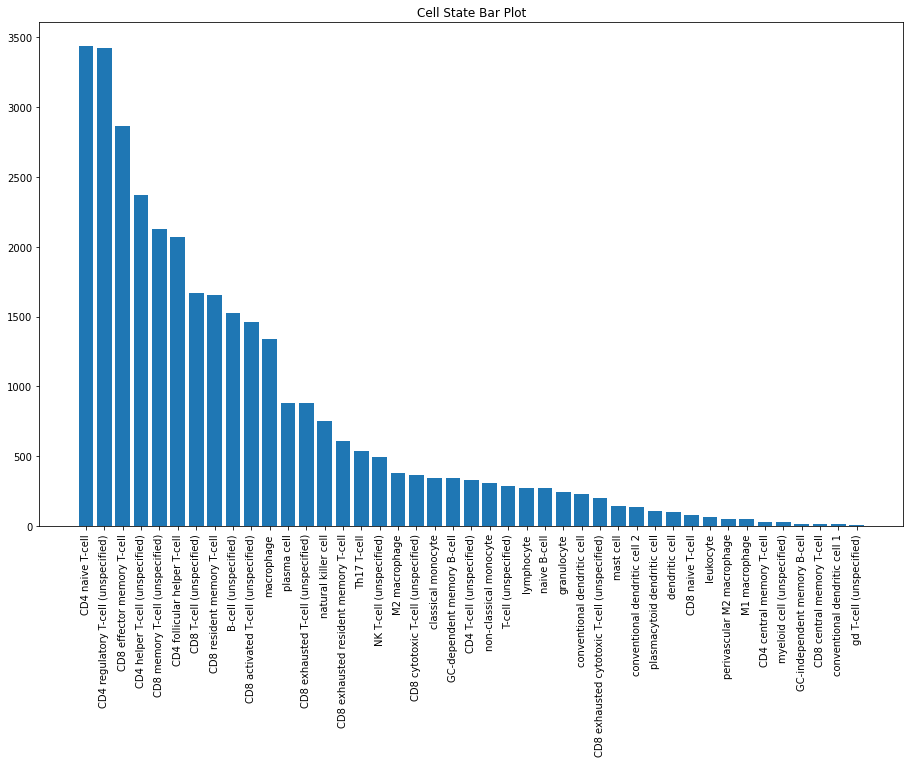

<Figure size 864x576 with 0 Axes>

In [12]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(v.index,v)
plt.xticks(rotation=90)
plt.title("Cell State Bar Plot")
plt.show()

plt.savefig('CellState 30% Subset BarPlot.png')

## 3. Unsupervised Machine Learning Part

## 3.1 Principal Component Analysis (PCA)
Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

The priority of PCA is to preserve large variances in the data using singular value decomposition.
It tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [13]:
seed = 12

In [14]:
# PCA Definition:
pca = PCA(n_components=30, random_state=seed)  # want to see only the first 30 components 

In [15]:
# Pipeline Definition: 1º) Scaling --> 2º) Model
pipe_pca = Pipeline([("scl", StandardScaler()), ("pca", pca)])

In [16]:
# Obtaining PCA Parameters:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 30,
 'random_state': 12,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [17]:
# Fit_transform:
gene_pca = pipe_pca.fit_transform(Subset30_int)

In [18]:
#The explained_variance_ratio_ attribute in sklearn returns the percentage of variance explained by each of the selected components.

pipe_pca.named_steps["pca"].explained_variance_ratio_

array([0.01894733, 0.015179  , 0.01019547, 0.00802534, 0.00712852,
       0.00556453, 0.00455122, 0.00406747, 0.00361995, 0.00292989,
       0.00266584, 0.00264625, 0.00255902, 0.00223908, 0.00204779,
       0.00187387, 0.00181955, 0.00171077, 0.00167591, 0.00159571,
       0.00147256, 0.00135203, 0.00132046, 0.00131077, 0.00118513,
       0.00114366, 0.00112219, 0.00109585, 0.00101079, 0.00099699])

In [19]:
#numpy cumsum returns the cumulative sum of the elements 
#in this case, i

evr = np.cumsum(pipe_pca.named_steps["pca"].explained_variance_ratio_)
evr

array([0.01894733, 0.03412633, 0.04432179, 0.05234713, 0.05947565,
       0.06504018, 0.0695914 , 0.07365887, 0.07727883, 0.08020871,
       0.08287455, 0.0855208 , 0.08807983, 0.09031891, 0.0923667 ,
       0.09424057, 0.09606012, 0.09777088, 0.09944679, 0.10104251,
       0.10251506, 0.1038671 , 0.10518756, 0.10649833, 0.10768346,
       0.10882712, 0.10994931, 0.11104516, 0.11205595, 0.11305294])

### PCA Visualization: interceptor location

In [20]:
# Finding out the interceptor that represents 95% of the total variance:
x_intercept = np.argmax(evr > 0.95) #evr is an array of the cumulative variances
print('The interceptor is located at component: ', x_intercept)

The interceptor is located at component:  0


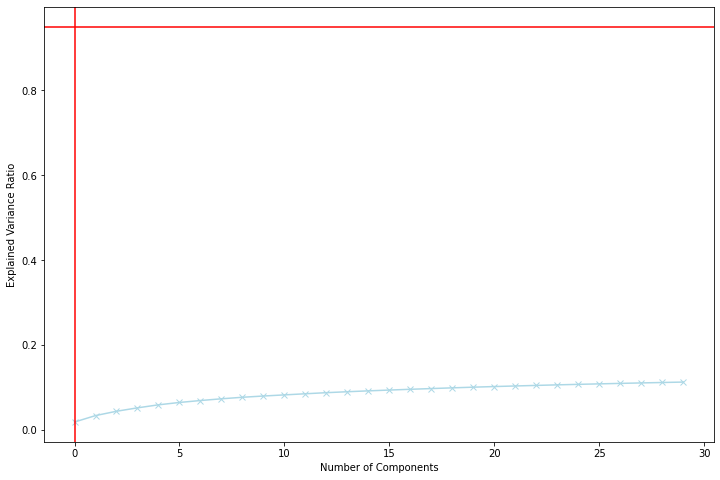

In [21]:
# Ploting the location of the interceptor:

plt.plot(evr, "-x", color="lightblue") #plotting the cumulative sum of variance, so we can where the variance increases are not as pronounced
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.axvline(x=x_intercept, color="red") #vertical line to see the number of components that corresponds to the 95% total variance
plt.axhline(y=0.95, color="red") #horizontal line for 95% of the total variance 
None

### PCA Scatter Visualization in 2-D: PCA example components

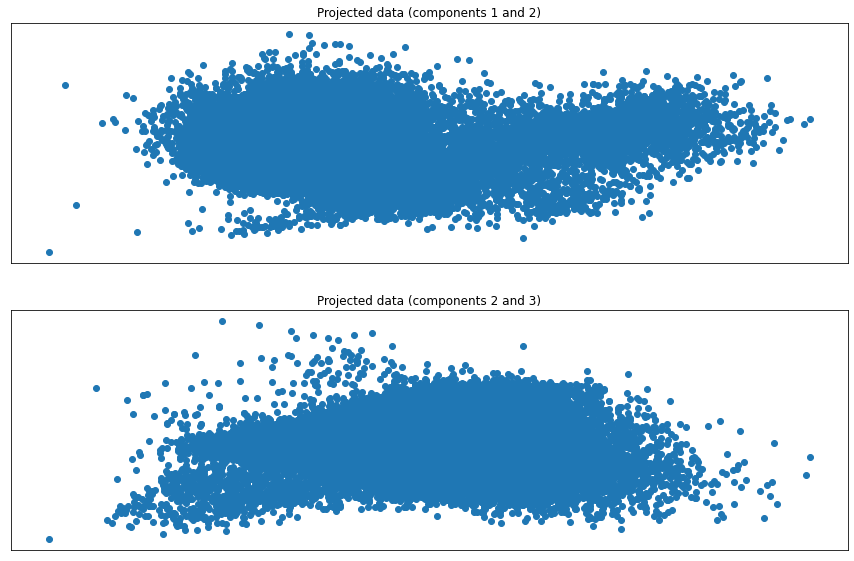

In [22]:
#After dimensionality reduction, we can use gene_pca plot the principal components 

plt.rcParams["figure.figsize"] = (15, 15)

fig = plt.figure()

# # plot original roll
# ax = fig.add_subplot(311, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
# ax.set_title("Original data")

# plot projected roll (components 1 and 2)
ax = fig.add_subplot(311)
ax.scatter(gene_pca[:, 0], gene_pca[:, 1],  cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data (components 1 and 2)')

# plot projected roll (components 2 and 3)
ax = fig.add_subplot(312)
ax.scatter(gene_pca[:, 1], gene_pca[:, 2],cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data (components 2 and 3)')
plt.show()


# # plot projected roll (components 1 and 3)
# ax = fig.add_subplot(313)
# ax.scatter(gene_pca[:, 2], gene_pca[:, 3],cmap=plt.cm.Spectral)
# plt.axis('tight')
# plt.xticks([]), plt.yticks([])
# plt.title('Projected data (components 1 and 3)')
# plt.show()

plt.show()

## 3.2 Scatter Visualization in 2-D: Using Uniform Manifold Approximation and Projection (UMAP)

Scatter Visualization in 2-D: Using Uniform Manifold Approximation and Projection (UMAP)

The biggest advantage of UMAP over t-SNE is the more optimal balance between local and global structure and the computational efficiency

https://umap-learn.readthedocs.io/en/latest/

**UMAP Parameters:**

**n_neighbors** = parameter to control how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data.

This means that low values of n_neighbors will force UMAP to concentrate on very local structure (potentially to the detriment of the big picture), while large values will push UMAP to look at larger neighborhoods of each point when estimating the manifold structure of the data, losing fine detail structure for the sake of getting the broader of the data.

**n_components** = the dimensionality of the reduced dimension space we will be embedding the data into

**min_dist** = parameter controls how tightly UMAP is allowed to pack points together. It, quite literally, provides the minimum distance apart that points are allowed to be in the low dimensional representation.

In [23]:
# UMAP Definition:
umap_embeddings = umap.UMAP(n_neighbors= 15, n_components=2,  min_dist= 0.5, random_state=seed)

# # Scanpy default: 
# # (n_neighbors= 15, n_components= 2,  min_dist= 0.5)

# # umap.UMAP default: 
# # (n_neighbors= 15, n_components= 1,  min_dist= 0.1)

In [24]:
# Fit_Transform:

# X_umap = umap_embeddings.fit_transform(Subset30_intTB)   
X_umap = umap_embeddings.fit_transform(gene_pca)   

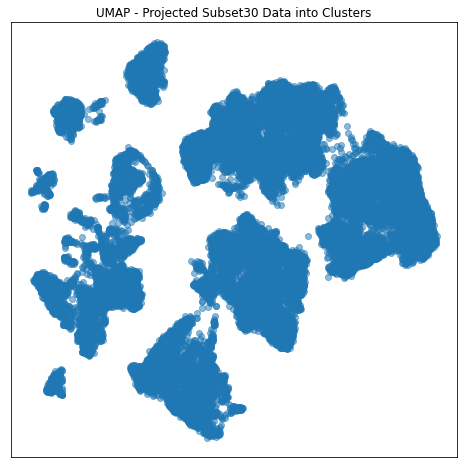

In [25]:
# Plot Result of UMAP:

fig = plt.figure(figsize =(8, 8))

# plot projected roll
ax = fig.add_subplot()
ax.scatter(X_umap[:, 0], X_umap[:, 1],cmap=plt.cm.Spectral, alpha=0.5)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('UMAP - Projected Subset30 Data into Clusters')
plt.savefig('UMAP Subset30 Data into Clusters.png')
plt.show()

## 3.3 Application of Clustering Techniques

### 12 classes

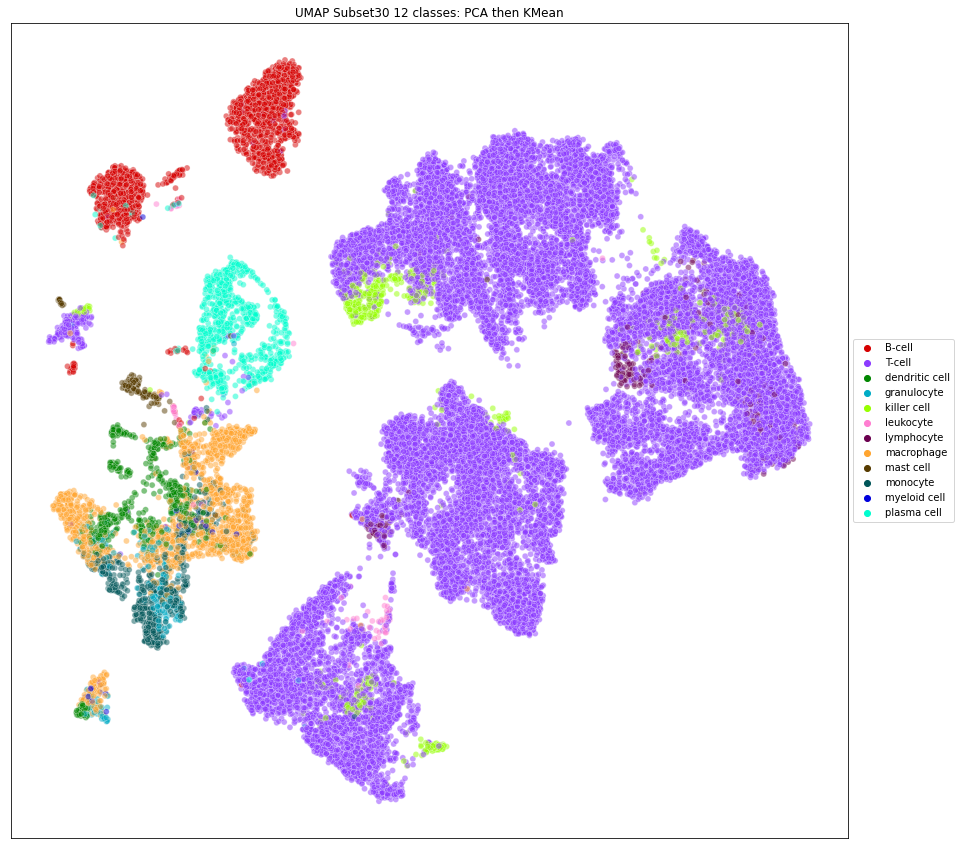

<Figure size 1080x1080 with 0 Axes>

In [27]:
cell_types = 12
n_optimal = 12

kmean = KMeans(n_clusters=cell_types)
kmean.fit(X_umap)
labels = kmean.labels_

# plot UMAP with labels
fig = plt.figure(figsize =(15, 15))
ax = fig.add_subplot()
pal = sns.color_palette(cc.glasbey, n_colors=cell_types)
order = sorted(Subset30["cell_type"].unique())
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], alpha=0.5, hue= Subset30["cell_type"], hue_order=order, ax=ax, cmap='viridis', legend='full', palette = pal)
plt.axis('tight')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([]), plt.yticks([])
plt.title('UMAP Subset30 12 classes: PCA then KMean')
plt.show()
plt.savefig('UMAP Subset30 12 classes PCA then KMean 20211028.png')

#### plot that only shows T-cells inn different colour

In [ ]:
t_cell = pd.DataFrame({'Cell': ['T_cell' if Subset30["cell_type"][i] == 'T-cell' else 'Other' for i in range(0,len(predictions['Cell']))]})
t_cell['Cell'].value_counts()

T_cell    24926
Other      7631
Name: Cell, dtype: int64

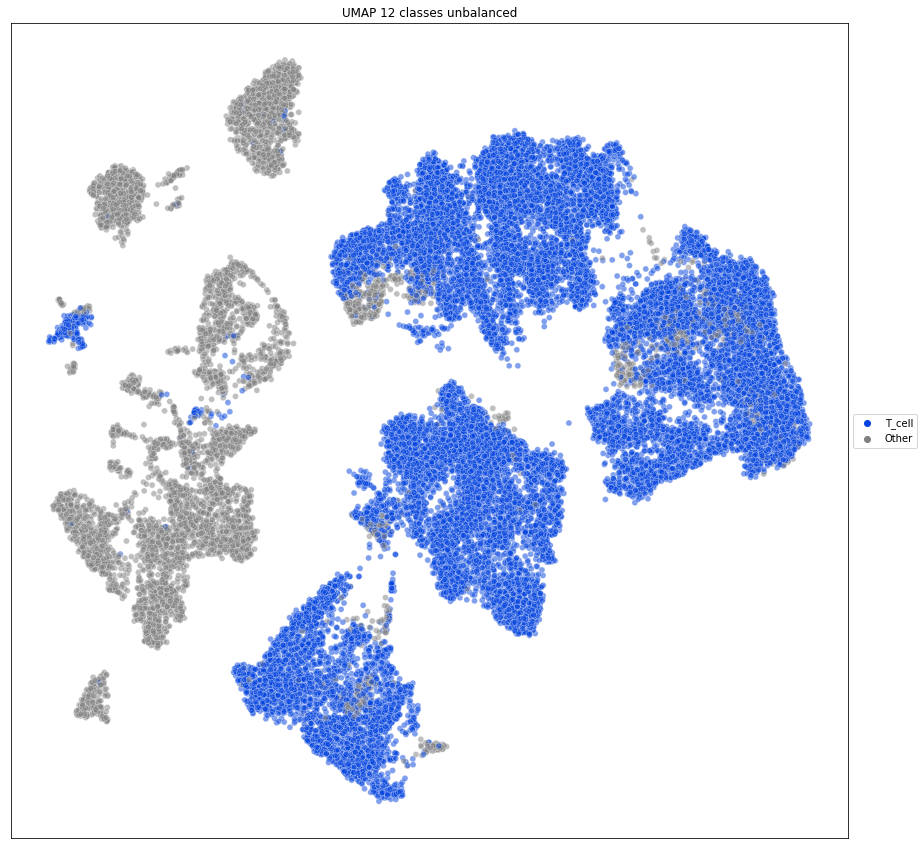

<Figure size 1080x1080 with 0 Axes>

In [ ]:
number_classes = t_cell['Cell'].nunique()

n_optimal = number_classes

kmean = KMeans(n_clusters=n_optimal)
kmean.fit(X_umap)
labels = kmean.labels_

# plot UMAP with labels
fig = plt.figure(figsize =(15, 15))
ax = fig.add_subplot()
order = sorted(predictions['Cell'].unique())
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], alpha=0.5, hue=t_cell['Cell'], ax=ax, cmap='viridis', legend='full', palette = ['#0343DF', 'grey'])

plt.axis('tight')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([]), plt.yticks([])
plt.title('UMAP 12 classes unbalanced')
plt.show()
plt.savefig('UMAP_12_classes.png')

### 43 classes

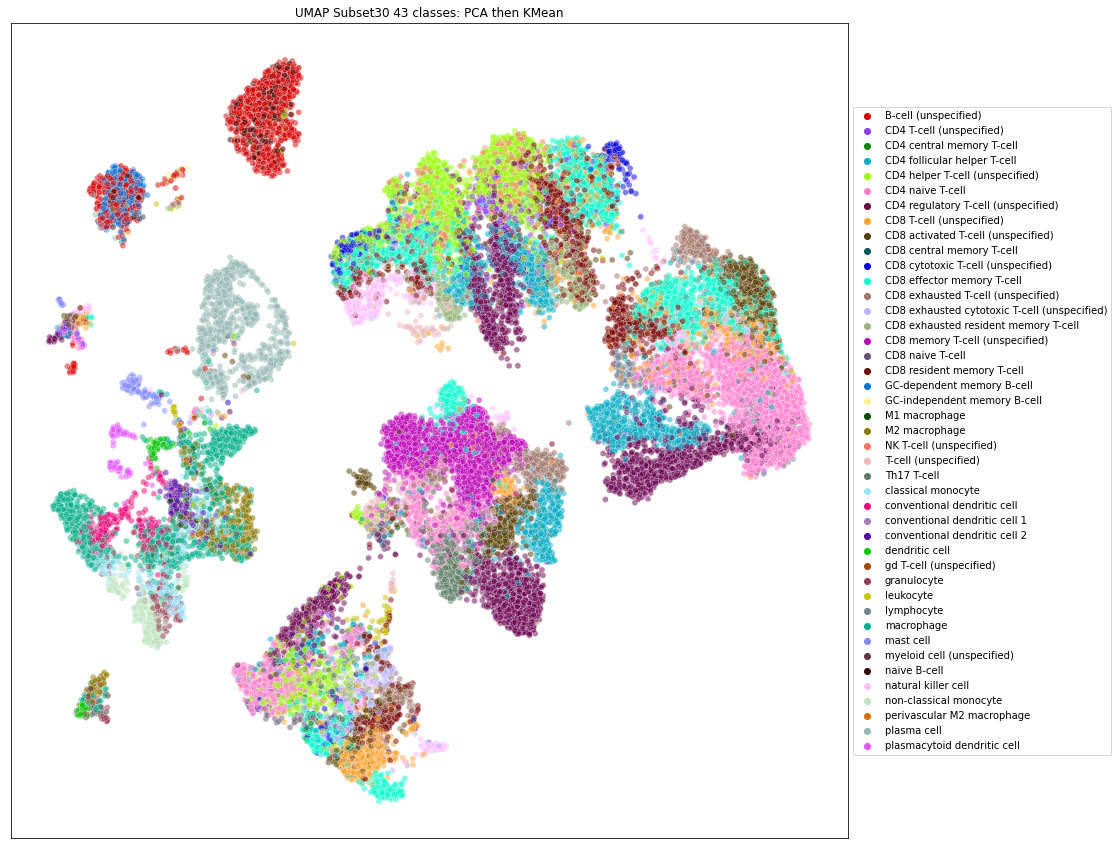

<Figure size 1080x1080 with 0 Axes>

In [ ]:
n_optimal = 43


#sc.tl.umap(adata, random_state=r_seed)

kmean = KMeans(n_clusters=n_optimal)
kmean.fit(X_umap)
labels = kmean.labels_

# plot UMAP with labels
fig = plt.figure(figsize =(15, 15))
ax = fig.add_subplot()
pal = palette = sns.color_palette(cc.glasbey, n_colors=43)
order = sorted(Subset30["cell_state"].unique())
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], alpha=0.5, hue= Subset30["cell_state"], hue_order=order, ax=ax, cmap='viridis', legend='full', palette = pal)
plt.axis('tight')

plt.xticks([]), plt.yticks([])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('UMAP Subset30 43 classes: PCA then KMean')
plt.show()
plt.savefig('UMAP Subset30 43 classes PCA then KMean 20211028.png')